In [55]:
import pandas as pd
from numpy import math
import numpy as np
import seaborn as sns
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [56]:
df = pd.read_csv('profits.csv')

In [57]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [58]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [59]:
df.shape

(1000, 5)

In [60]:
df.isnull().sum()
#df.dropna(inplace=True)
#df.drop('date',inplace=True,axis=1)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [61]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


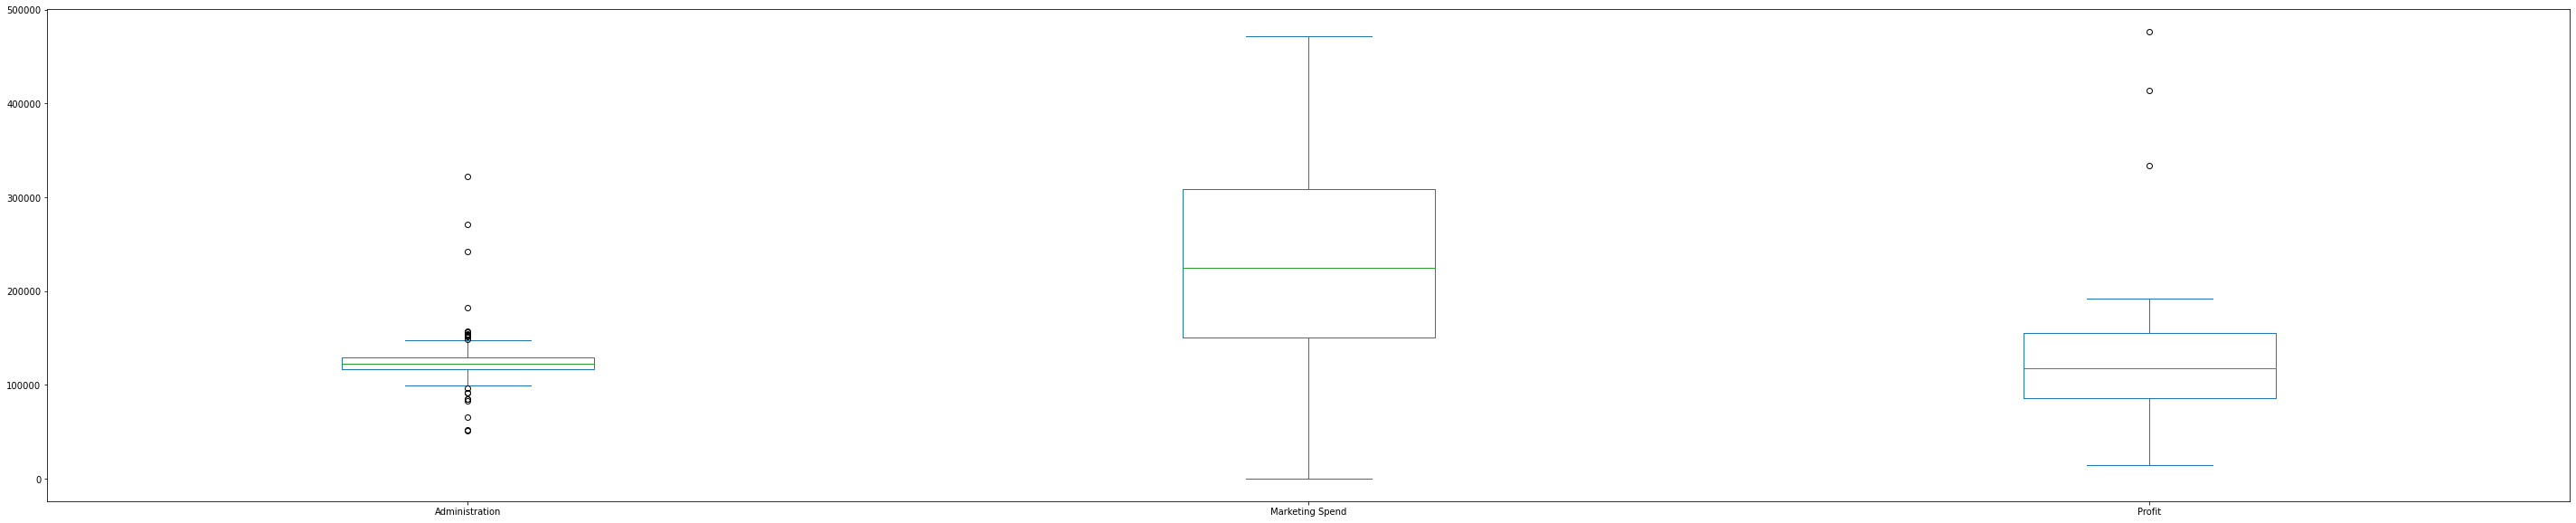

In [62]:
df.drop(columns=['R&D Spend']).plot(kind='box',figsize=(50,10))
plt.show()

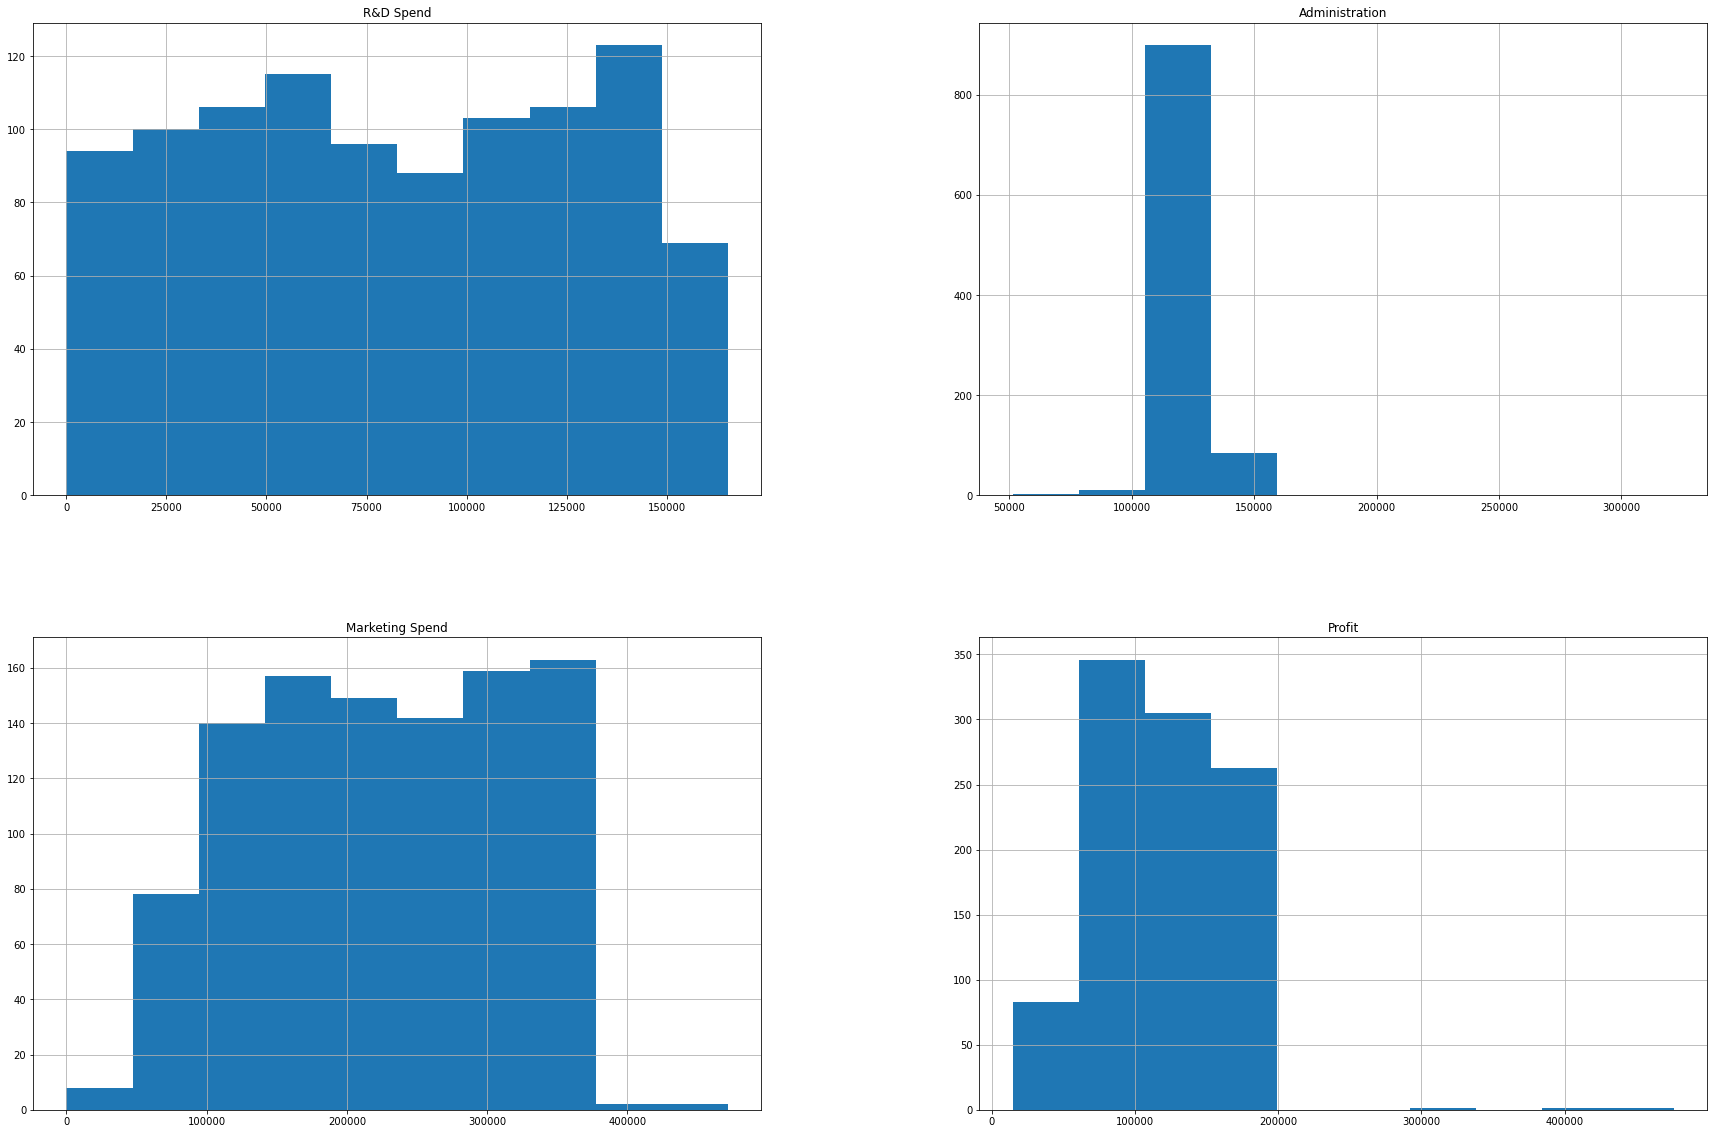

In [63]:
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot:>

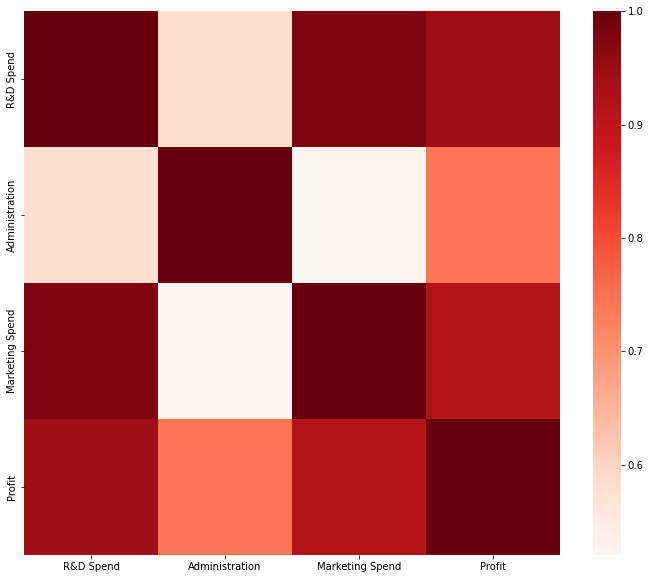

In [64]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='Reds')

<AxesSubplot:ylabel='Frequency'>

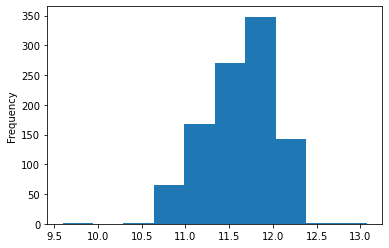

In [65]:
priceTransform=np.log(df.Profit)
priceTransform.plot(kind='hist')

<AxesSubplot:xlabel='Marketing Spend', ylabel='count'>

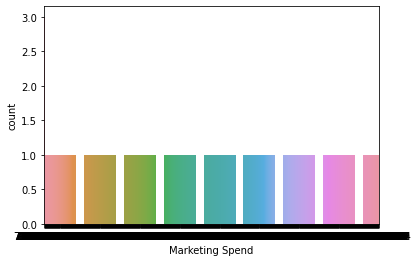

In [66]:
sns.countplot(x='Marketing Spend',data=df)

In [69]:
reg = linear_model.LinearRegression()

In [75]:
reg.fit(df[['R&D Spend','Administration','Marketing Spend']],df.Profit)

LinearRegression()

In [77]:
X = df[['R&D Spend','Administration','Marketing Spend']].values
y = df['Profit'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [79]:
std = StandardScaler()
X = std.fit_transform(X)

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
pred_lr = lr.predict(X_test)

In [83]:
score_lr = lr.score(X_train,y_train)
print(lr.coef_[0])
print(lr.intercept_)

0.5751284441361303
-74539.30628368819


In [84]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test,pred_lr)

print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)
print('Re score: ',r2_lr)

Mae_lr:  3612.231437352317
Mse_lr:  229303280.49729624
Rmse_lr:  15142.76330453911
Re score:  0.9024010480895768


In [85]:
preco_lr = df['Profit']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Profit':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Profit,Predictions,Error
0,192261.83,159857.906335,32403.923665
1,191792.06,90173.199064,101618.860936
2,191050.39,165092.912435,25957.477565
3,182901.99,98365.937030,84536.052970
4,166187.94,99042.067637,67145.872363


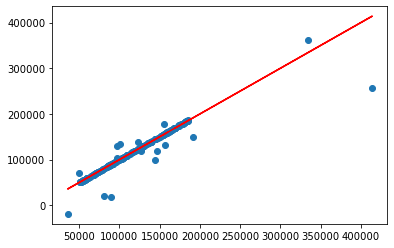

In [86]:
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')